In [27]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [179]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def sigmoidDer(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

def softmax(Z):
    f_Z = np.exp(Z) / sum(np.exp(Z))
    return f_Z

In [191]:
def readData():
#         training_image = sys.argv[1]
#         training_label = sys.argv[2]
#         test_image = sys.argv[3]
#         test_label = sys.argv[4]

    training_image = 'train_image.csv'
    training_label = 'train_label.csv'
    test_image = 'test_image.csv'
    test_label = 'test_label.csv'

    df = pd.read_csv(training_image, header=None)
    df['label'] = pd.read_csv(training_label, header=None)
    df = df.loc[0:1000]
    training_data = df

    df = pd.read_csv(test_image, header=None)
    df['label'] = pd.read_csv(test_label, header=None)
    test_data = df
    
    return training_data, test_data

In [192]:
class Model:

    def __init__(self, hidden_layers=1):
        self.weights = [0,0]
        self.weights[0] = np.random.rand(16, 784) - 0.5
        self.weights[1] = np.random.rand(10, 16) - 0.5
        
        self.bias = [0,0]
        self.bias[0] = np.random.rand(16,1) - 0.5
        self.bias[1] = np.random.rand(10,1) - 0.5

        self.act = [0,0]
        self.act[0] ##input array
        self.act[1] 
        
        self.W1 = np.random.rand(16, 784) - 0.5
        self.b1 = np.random.rand(16, 1) - 0.5
        self.W2 = np.random.rand(10, 16) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5
        self.W3 = np.random.rand(10, 10) - 0.5
        self.b3 = np.random.rand(10, 1) - 0.5

In [193]:
class NeuralNetwork:
    def __init__(self, epochs = 50, alpha = 0.1, batch_size = 1000, hidden_layers = 1, neurons = 5):
        self.epochs = epochs
        self.alpha = alpha
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers
        self.neurons = neurons

        self.train_accuracy = [0]*(epochs+1)
        self.test_accuracy = [0]*(epochs+1)
        self.model = Model(hidden_layers)
    
    def init_data(self, training_data, test_data):
        self.training_data, self.test_data = training_data, test_data
    
    def accuracy(self, i):
        """
        input X and y of train and test data and outputs accuracy
        Note : the y value for each instance is a single predicted number instead of 10 length array storing probabilities
        """

        print("******************\nIn accuracy")
        
        
        train_X = self.training_data.iloc[:, 0:784]
        train_y = self.training_data['label'].to_numpy()
        train_X = train_X.to_numpy()
        train_X = train_X.T
        train_X = train_X/784
        _, _, _,_,_, A3 = self.feedForward(train_X)
        y_pred = np.argmax(A3, 0)
        print(y_pred)
        print(train_y)
        acc = np.sum(y_pred == train_y) / train_y.size
        print(acc)
        self.train_accuracy[i] = acc
        
        test_X = self.test_data.iloc[:, 0:784]
        test_y = self.test_data['label'].to_numpy()
        test_X = test_X.to_numpy()
        test_X = test_X.T
        test_X = test_X/784
        _, _, _,_,_, A3 = self.feedForward(test_X)
        y_pred = np.argmax(A3, 0)
        print(y_pred)
        print(test_y)
        acc = np.sum(y_pred == test_y) / test_y.size
        print(acc)
        self.test_accuracy[i] = acc

    def plot(self):
        # Define data values
        x = [k for k in range(self.epochs+1)]
        y = self.train_accuracy
        z = self.test_accuracy
        plt.rcParams["figure.autolayout"] = True

        line1, = plt.plot(y, label = "training")
        line2, = plt.plot(z, label = "test")
        leg = plt.legend(loc='upper right')
        plt.show()


    def feedForward(self, X):
        """
        Input : X is features in the input layer as pandas Df, m is no of samples i.e. batch size or leftover
        Algo : converts to numpy 2D Arr, 
        Outputs : probability of output layer
        for H samples, input is H X 764 and output is H X 10
        """        
        Z1 = self.model.W1.dot(X) + self.model.b1
        A1 = sigmoid(Z1)
        Z2 = self.model.W2.dot(A1) + self.model.b2
        A2 = sigmoid(Z2)
        Z3 = self.model.W3.dot(A2) + self.model.b3
        A3 = softmax(Z3)
        return Z1, A1, Z2, A2, Z3, A3

    def lossFunc(self, true_y, pred_y):
        """
        Takes as input numpy 2D matrix of prediction probabilities and 1D pandas DF of true_y values
        Convert true values to 2D matrix, 1 for true value and 0 for rest
        Matrix : for H samples H X 10
        Algo : Mean of MSE of each sample
        """

        #print("loss function")
        
        n = len(true_y)
        theta = np.empty(shape=(n, 10))
        theta.fill(0)

        true_y = true_y.to_numpy()
        for k in range(n):
            theta[k][true_y[k]] = 1

        print(pred_y.shape, theta.shape)
        
        return np.square(np.subtract(pred_y, theta)).mean(1).mean()

    def oneHot(self, true_y):

        n = len(true_y)
        theta = np.empty(shape=(n, 10))
        theta.fill(0)

        true_y = true_y.to_numpy()
        for k in range(n):
            theta[k][true_y[k]] = 1
        return theta


    def backPropagate(self, m, X, Y, Z1, A1, Z2, A2, Z3, A3):
        """
        Takes as input a cost function value and adjusts the weights and biases of the model
        For each batch that went through the forward pass, we backpropagate using SGD(Stochastic Gradient Descent)
        """
        one_hot_Y = one_hot(Y)
        dZ3 = A3 - one_hot_Y
        dW3 = 1 / m * dZ3.dot(A2.T)
        db3 = 1 / m * np.sum(dZ3)
        
        dZ2 = self.model.W3.T.dot(dZ3) * sigmoidDer(Z2)
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2)
        
        dZ1 = self.model.W2.T.dot(dZ2) * sigmoidDer(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1)
        
        self.updateParam(dW1, db1, dW2, db2, dW3, db3)
        
        return


    def updateParam(self, dW1, db1, dW2, db2, dW3, db3):
        self.model.W1 = self.model.W1 - self.alpha * dW1
        self.model.b1 = self.model.b1 - self.alpha * db1    
        self.model.W2 = self.model.W2 - self.alpha * dW2  
        self.model.b2 = self.model.b2 - self.alpha * db2
        self.model.W3 = self.model.W3 - self.alpha * dW3  
        self.model.b3 = self.model.b3 - self.alpha * db3 
        

    def algo(self):
        """
        backbone of the algorithm
        For each epoch, shuffles data and divides in different batches
        For each batch, feedforward the training samples, calculate loss function and then backpropagate to change weights and biases
        After all batches of an epoch are computed, calculate their accuracy on training and test data
        """       
        for i in range (1, self.epochs+1):
            print("\nEpoch #", i)
            np.random.shuffle(self.training_data.values)
            n = len(self.training_data)
    
            for j in range(0, n, self.batch_size):
                #print("Batch #", j)

                l = min(n, j+self.batch_size)
                m = l-j ##no of training samples in a batch
                train_X = self.training_data.iloc[j:l, 0:784]
                train_y = self.training_data.iloc[j:l, 784]
                train_X = train_X.to_numpy()
                train_X = train_X.T
                train_X = train_X/784
                train_y = train_y.to_numpy()
                #print(train_X, train_y)
                
                Z1, A1, Z2, A2, Z3, A3 = self.feedForward(train_X)
                self.backPropagate(m, train_X, train_y, Z1, A1, Z2, A2, Z3, A3)
            
                #print(j, self.model.weights)
            self.accuracy(i)
        #print(self.train_accuracy)
        



In [190]:
if __name__ == "__main__":
    training_data, test_data = readData()
    neural_network = NeuralNetwork(epochs = 50, alpha = 0.1, batch_size = 10, hidden_layers = 1, neurons = 5)
    neural_network.init_data(training_data, test_data)
    neural_network.algo()


Epoch # 1
******************
In accuracy
[7 7 7 ... 1 7 2]
[1 9 1 ... 3 1 2]
0.13686313686313686
[7 7 1 ... 2 1 1]
[7 2 1 ... 4 5 6]
0.1409

Epoch # 2
******************
In accuracy
[3 3 4 ... 4 4 4]
[6 6 1 ... 9 4 3]
0.13486513486513488
[4 3 4 ... 4 4 4]
[7 2 1 ... 4 5 6]
0.1489

Epoch # 3
******************
In accuracy
[1 1 1 ... 5 4 5]
[9 1 8 ... 9 4 5]
0.1878121878121878
[4 1 1 ... 1 1 1]
[7 2 1 ... 4 5 6]
0.178

Epoch # 4
******************
In accuracy
[7 7 7 ... 7 7 7]
[7 6 0 ... 0 1 7]
0.11688311688311688
[7 7 7 ... 7 7 7]
[7 2 1 ... 4 5 6]
0.1028

Epoch # 5
******************
In accuracy
[9 1 1 ... 1 1 9]
[5 1 3 ... 4 8 9]
0.23376623376623376
[9 1 1 ... 1 1 1]
[7 2 1 ... 4 5 6]
0.2442

Epoch # 6
******************
In accuracy
[0 0 1 ... 4 1 1]
[6 0 7 ... 4 2 1]
0.25674325674325676
[7 1 1 ... 1 1 1]
[7 2 1 ... 4 5 6]
0.243

Epoch # 7
******************
In accuracy
[1 1 0 ... 1 1 0]
[9 8 7 ... 1 6 0]
0.2837162837162837
[0 0 1 ... 1 1 0]
[7 2 1 ... 4 5 6]
0.2657

Epoch # 8
******

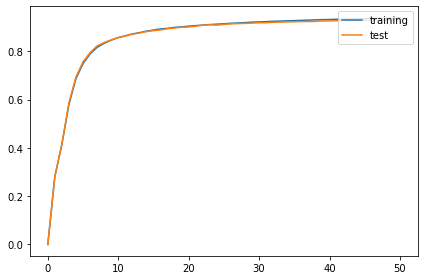

In [172]:
neural_network.plot()

In [194]:
test_data


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [41]:
training_image = 'train_image.csv'
training_label = 'train_label.csv'
test_image = 'test_image.csv'
test_label = 'test_label.csv'

df = pd.read_csv(training_image, header=None)
df['label'] = pd.read_csv(training_label, header=None)
df = df.loc[0:9999]


In [177]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
